# Employee Income (Dataset II)

I am going to perform 4 machine learning model to classify weather employee's salary is more than 50k or not.

The models are:
Decision tree,
Neural Network,
SVM

Reinforcement learning (using env and gym)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('income_eval.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Visualization

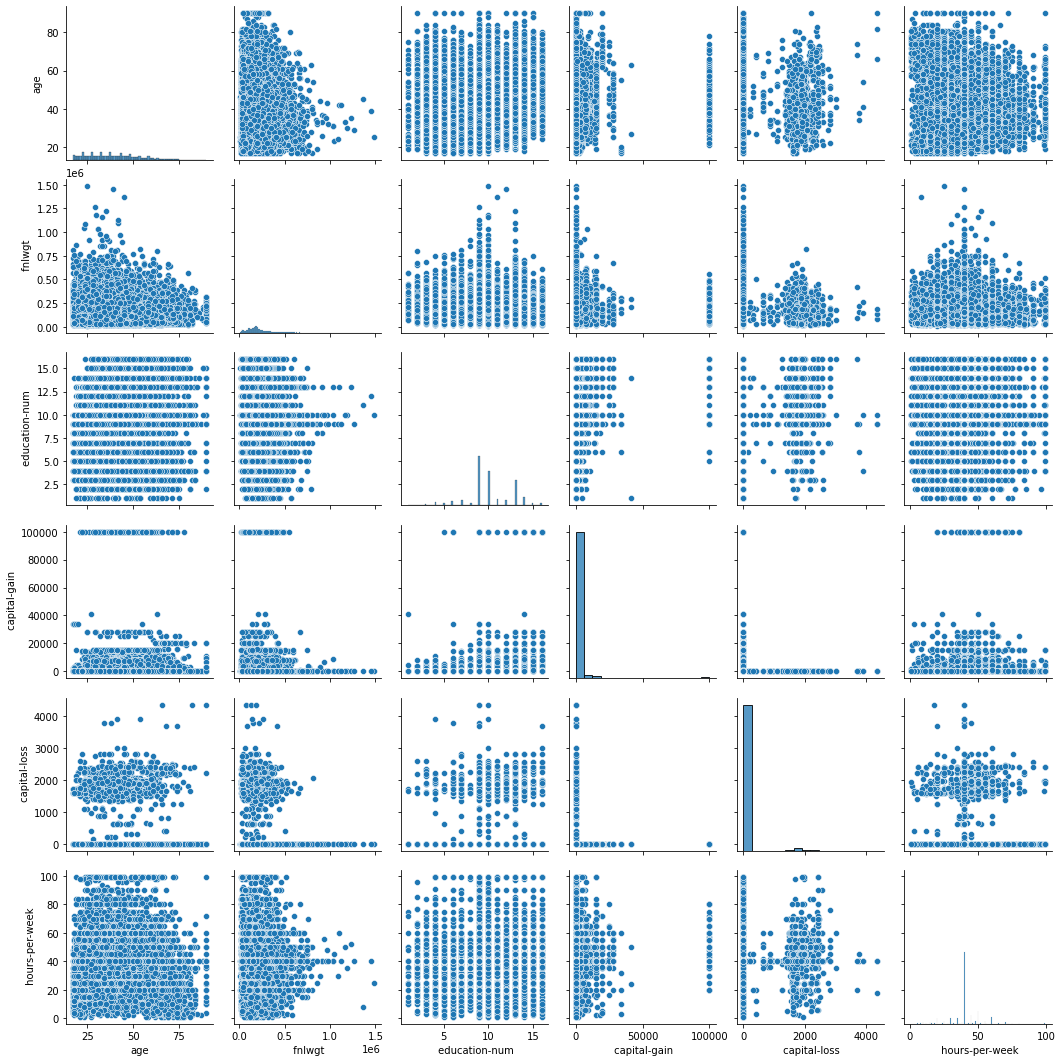

In [4]:
sns.pairplot(data)

<AxesSubplot:xlabel=' education', ylabel='count'>

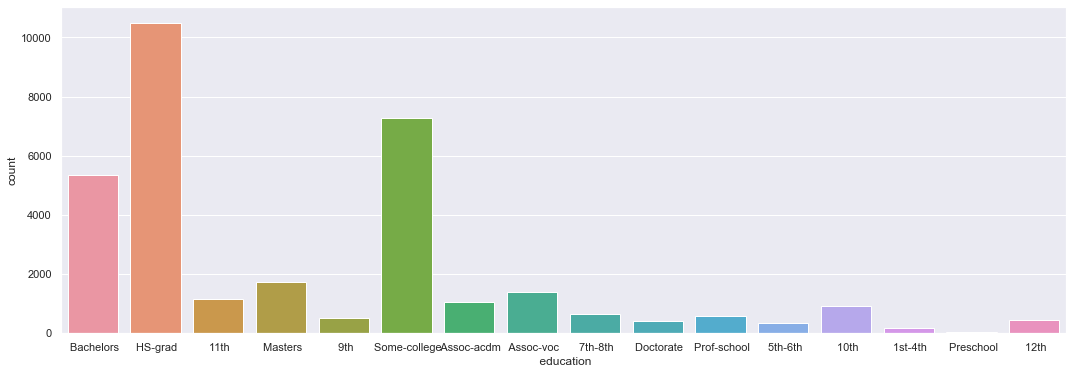

In [5]:
sns.set(rc={'figure.figsize':(18,6)})
sns.countplot(x=" education", data=data)

<AxesSubplot:xlabel=' occupation', ylabel='count'>

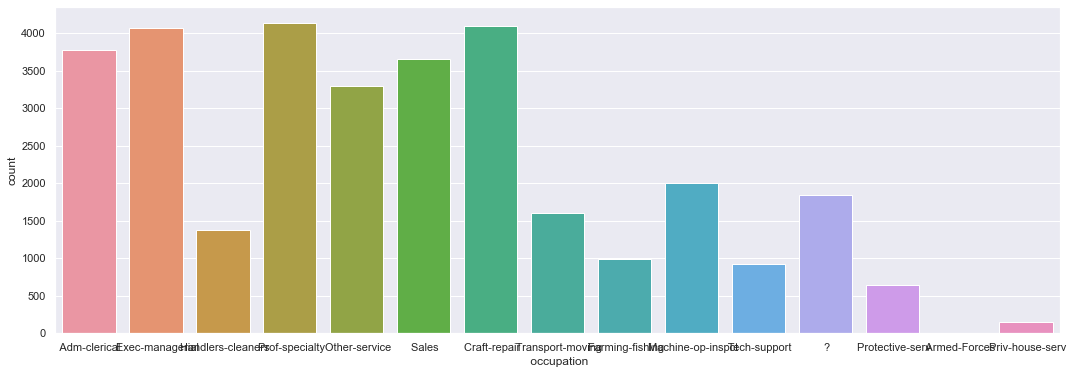

In [6]:
sns.set(rc={'figure.figsize':(18,6)})
sns.countplot(x=" occupation", data=data)

<AxesSubplot:xlabel=' sex', ylabel='count'>

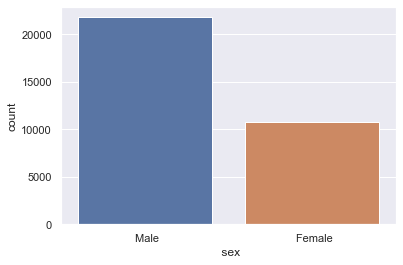

In [7]:
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(x=" sex", data=data)

<AxesSubplot:xlabel=' workclass', ylabel='count'>

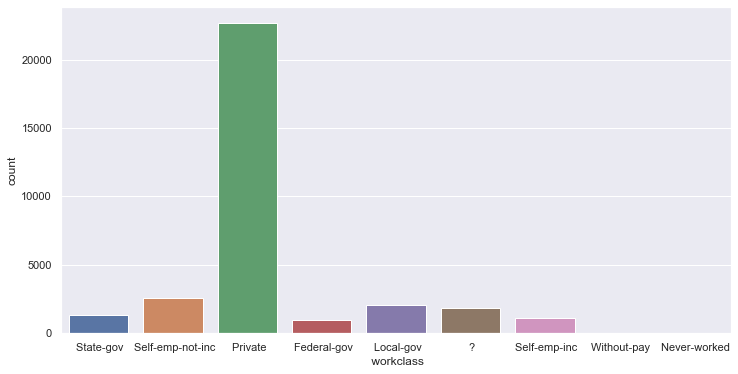

In [8]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x=" workclass", data=data)

/Users/vaishnavbharadwaj/Documents/lectures/mldm_cw/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

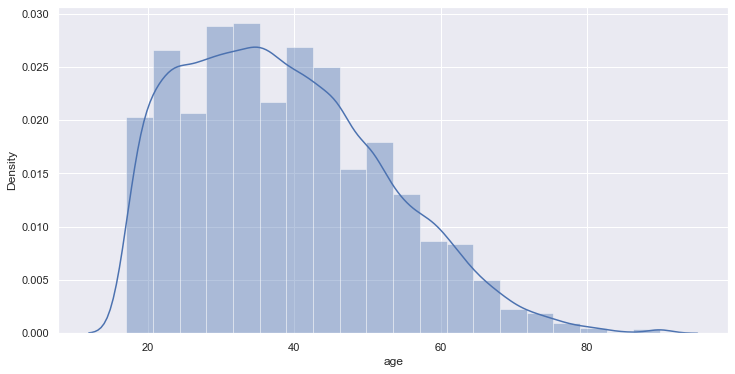

In [9]:
sns.distplot(data['age'],bins=20,kde=True)

/Users/vaishnavbharadwaj/Documents/lectures/mldm_cw/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' hours-per-week'>

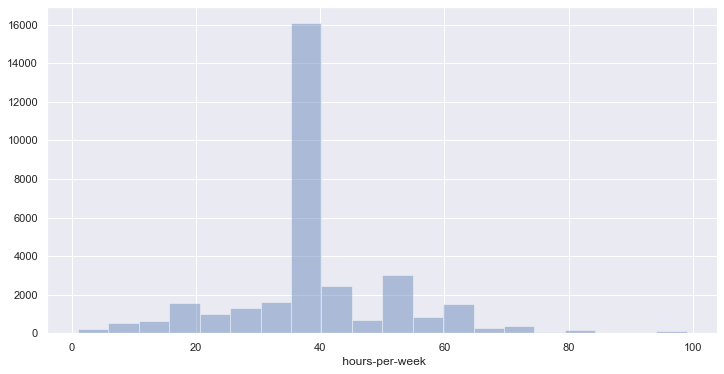

In [10]:
sns.distplot(data[' hours-per-week'],bins=20,kde=False)

<AxesSubplot:xlabel=' education', ylabel='count'>

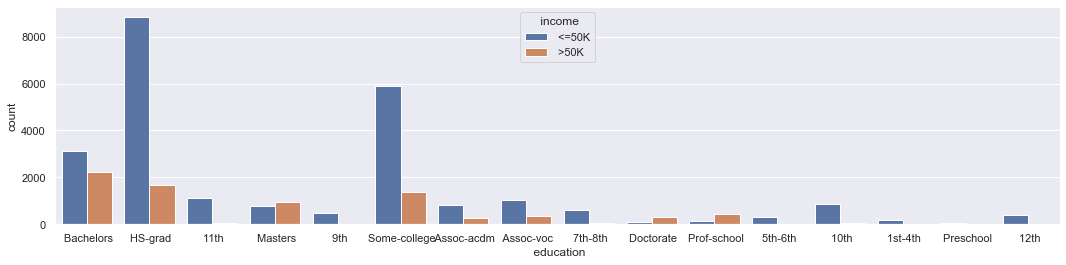

In [11]:
sns.set(rc={'figure.figsize':(18,4)})
sns.countplot(x=" education", data=data, hue=" income")

In [12]:
data[' sex']

0           Male
1           Male
2           Male
3           Male
4         Female
          ...   
32556     Female
32557       Male
32558     Female
32559       Male
32560     Female
Name:  sex, Length: 32561, dtype: object

In [13]:
gender = {' Male': 0,' Female': 1}
  
# traversing through dataframe
# Gender column and writing
# values where key matches
data[' sex'] = [gender[item] for item in data[' sex']]
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,<=50K


In [14]:
x = data.drop([' sex'],1)

/var/folders/48/3kg91zh957zb76vs80tyc5z40000gn/T/ipykernel_15047/3449627038.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = data.drop([' sex'],1)


In [15]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K


In [16]:
y = data.drop([' race'],1)

/var/folders/48/3kg91zh957zb76vs80tyc5z40000gn/T/ipykernel_15047/1892775059.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  y = data.drop([' race'],1)


In [17]:
y.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,0,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,1,0,0,40,Cuba,<=50K


In [18]:
y.dropna(subset=[' workclass'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,0,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,1,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,1,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,1,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,0,0,0,20,United-States,<=50K


In [19]:
spec_chars = ["â€¦","ðŸ¥³","?"]
for char in spec_chars:
    y[' workclass'] = y[' workclass'].str.replace(char, ' ')

/var/folders/48/3kg91zh957zb76vs80tyc5z40000gn/T/ipykernel_15047/2163057915.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  y[' workclass'] = y[' workclass'].str.replace(char, ' ')


In [20]:
y.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,0,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,1,0,0,40,Cuba,<=50K


In [21]:
y.dropna(subset=[' workclass'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,0,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,1,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,1,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,1,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,0,0,0,20,United-States,<=50K


In [22]:
spec_chars = ["â€¦","ðŸ¥³","?"]
for char in spec_chars:
    y[' occupation'] = y[' occupation'].str.replace(char, ' ')

/var/folders/48/3kg91zh957zb76vs80tyc5z40000gn/T/ipykernel_15047/2512072329.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  y[' occupation'] = y[' occupation'].str.replace(char, ' ')


In [23]:
y.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,0,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,1,0,0,40,Cuba,<=50K


In [24]:
for col_name in y.columns:
    if y[col_name].dtypes == 'object':
        unique_cat = len(y[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature ' workclass' has 9 unique categories
Feature ' education' has 16 unique categories
Feature ' marital-status' has 7 unique categories
Feature ' occupation' has 15 unique categories
Feature ' relationship' has 6 unique categories
Feature ' native-country' has 42 unique categories
Feature ' income' has 2 unique categories


In [25]:
workclass_dummies = pd.get_dummies(data[' workclass'])
education_dummies = pd.get_dummies(data[' education'])
maritalStatus_dummies = pd.get_dummies(data[' marital-status'])
occupation_dummies = pd.get_dummies(data[' occupation'])
relationship_dummies = pd.get_dummies(data[' relationship'])
race_dummies = pd.get_dummies(data[' race'])

In [26]:
frames = [data, workclass_dummies, education_dummies, maritalStatus_dummies, occupation_dummies, relationship_dummies, race_dummies]

In [27]:
results = pd.concat(frames,axis=1)

In [28]:
results = results.drop([' workclass',' education',' marital-status',' occupation',' relationship', ' race', ' native-country'], axis=1)

In [29]:
results.head(10)

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,?,Federal-gov,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,77516,13,0,2174,0,40,<=50K,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,13,0,0,0,13,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,0,0,0,40,<=50K,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,7,0,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,<=50K,0,0,...,0,0,0,0,1,0,0,1,0,0
5,37,284582,14,1,0,0,40,<=50K,0,0,...,0,0,0,0,1,0,0,0,0,1
6,49,160187,5,1,0,0,16,<=50K,0,0,...,1,0,0,0,0,0,0,1,0,0
7,52,209642,9,0,0,0,45,>50K,0,0,...,0,0,0,0,0,0,0,0,0,1
8,31,45781,14,1,14084,0,50,>50K,0,0,...,1,0,0,0,0,0,0,0,0,1
9,42,159449,13,0,5178,0,40,>50K,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
results.isnull().sum().sort_values(ascending=False).head()

age                       0
 Priv-house-serv          0
 Married-civ-spouse       0
 Married-spouse-absent    0
 Never-married            0
dtype: int64

In [31]:
#  pip install -U scikit-learn

In [32]:
results.isnull().sum().sort_values(ascending=False).head()

age                       0
 Priv-house-serv          0
 Married-civ-spouse       0
 Married-spouse-absent    0
 Never-married            0
dtype: int64

In [33]:
results[' income']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name:  income, Length: 32561, dtype: object

In [34]:
income = {' <=50K': 0,' >50K': 1}

results[' income'] = [income[item] for item in results[' income']]

In [35]:
results.head(10)

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,?,Federal-gov,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,77516,13,0,2174,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,13,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,0,0,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,7,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,37,284582,14,1,0,0,40,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,49,160187,5,1,0,0,16,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7,52,209642,9,0,0,0,45,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,31,45781,14,1,14084,0,50,1,0,0,...,1,0,0,0,0,0,0,0,0,1
9,42,159449,13,0,5178,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
X = results.drop([' income'], axis=1)
X = np.array(X)
y = results[' income']

In [37]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name:  income, dtype: int64

<AxesSubplot:ylabel=' income'>

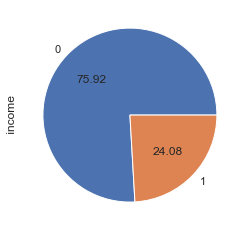

In [38]:
y.value_counts().plot.pie(autopct='%.2f')

In [39]:
# !pip3 install imblearn

## Over Sampled data

<AxesSubplot:ylabel=' income'>

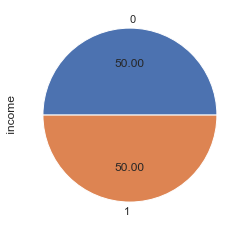

In [40]:
from imblearn.over_sampling import RandomOverSampler

overSample = RandomOverSampler(sampling_strategy=1)
X_ros,y_ros = overSample.fit_resample(X,y)

y_ros.value_counts().plot.pie(autopct='%.2f')

## Under Sampled data

<AxesSubplot:ylabel=' income'>

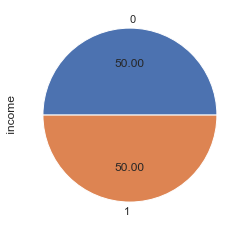

In [41]:
from imblearn.under_sampling import RandomUnderSampler

underSample = RandomUnderSampler(sampling_strategy=1)
X_res,y_res = underSample.fit_resample(X,y)

y_res.value_counts().plot.pie(autopct='%.2f')

In [42]:
X_ros

array([[    39,  77516,     13, ...,      0,      0,      1],
       [    50,  83311,     13, ...,      0,      0,      1],
       [    38, 215646,      9, ...,      0,      0,      1],
       ...,
       [    45, 168232,     13, ...,      0,      0,      1],
       [    49, 337768,     14, ...,      0,      0,      1],
       [    29, 198493,     11, ...,      0,      0,      1]])

In [43]:
X_res

array([[    23, 434467,     10, ...,      0,      0,      1],
       [    24, 190290,     11, ...,      0,      0,      1],
       [    20, 161092,     10, ...,      0,      0,      1],
       ...,
       [    53, 321865,     14, ...,      0,      0,      1],
       [    40, 154374,      9, ...,      0,      0,      1],
       [    52, 287927,      9, ...,      0,      0,      1]])

In [44]:
import pandas as pd
X_ros = pd.DataFrame(X_ros)
X_res = pd.DataFrame(X_res)


# Decision tree - OVER sampled data

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.30, random_state=42)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

dt_us = DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=3, min_samples_leaf=5)
dt_us.fit(X_train, y_train)

y_pred = dt_us.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

print("Report : ",classification_report(y_test, y_pred))

print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)

Confusion Matrix:  [[4867 2524]
 [ 823 6618]]
Report :                precision    recall  f1-score   support

           0       0.86      0.66      0.74      7391
           1       0.72      0.89      0.80      7441

    accuracy                           0.77     14832
   macro avg       0.79      0.77      0.77     14832
weighted avg       0.79      0.77      0.77     14832

Accuracy :  77.43392664509169


## Hyperparameter tunning for Decision tree

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
parameters = {'max_depth' : (10,30,50,70,90,100),
             'criterion' : ('gini', 'entropy'),
             'max_depth' : (3,5,7,9,10),
             'max_features' : ('auto', 'sqrt', 'log2'),
             'min_samples_split': (2,4,6)
             }

In [50]:
DT_grid = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv=5, verbose = True)

In [51]:
X_train , X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.30, random_state=42)
DT_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [52]:
DT_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=4)

In [55]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth = 10, min_samples_split = 4, max_features = 'sqrt')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=4, random_state=100)

In [56]:
dts_accuracy = model.score(X_train, y_train)*100
print(f'Train Accuracy {model.score(X_train, y_train): .3f}')
print(f'Test Accuracy {model.score(X_test, y_test): .3f}')

Train Accuracy  0.812
Test Accuracy  0.802


# Neural network

In [57]:
!pip3 install keras
!pip3 install tensorflow

You should consider upgrading via the '/Users/vaishnavbharadwaj/Documents/lectures/mldm_cw/env/bin/python3 -m pip install --upgrade pip' command.


You should consider upgrading via the '/Users/vaishnavbharadwaj/Documents/lectures/mldm_cw/env/bin/python3 -m pip install --upgrade pip' command.


In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import adam_v2

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34608 entries, 39302 to 15795
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       34608 non-null  int64
 1   1       34608 non-null  int64
 2   2       34608 non-null  int64
 3   3       34608 non-null  int64
 4   4       34608 non-null  int64
 5   5       34608 non-null  int64
 6   6       34608 non-null  int64
 7   7       34608 non-null  int64
 8   8       34608 non-null  int64
 9   9       34608 non-null  int64
 10  10      34608 non-null  int64
 11  11      34608 non-null  int64
 12  12      34608 non-null  int64
 13  13      34608 non-null  int64
 14  14      34608 non-null  int64
 15  15      34608 non-null  int64
 16  16      34608 non-null  int64
 17  17      34608 non-null  int64
 18  18      34608 non-null  int64
 19  19      34608 non-null  int64
 20  20      34608 non-null  int64
 21  21      34608 non-null  int64
 22  22      34608 non-null  int64
 23  23     

In [60]:
optimizer = adam_v2.Adam(learning_rate=0.01, decay=1e-6)

model = Sequential([Dense(5, input_shape=(65,), activation='relu'),Dense(1, activation="sigmoid"),])
    
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])

2022-05-31 14:02:17.396650: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [61]:
model.fit(X_train,y_train, epochs=50,batch_size=100)

Epoch 1/50
347/347 [==============================] - 1s 2ms/step - loss: 487.4931 - accuracy: 0.5582
Epoch 2/50
347/347 [==============================] - 1s 2ms/step - loss: 70.2769 - accuracy: 0.5649
Epoch 3/50
347/347 [==============================] - 1s 2ms/step - loss: 39.3872 - accuracy: 0.5714
Epoch 4/50
347/347 [==============================] - 1s 2ms/step - loss: 19.8465 - accuracy: 0.5931
Epoch 5/50
347/347 [==============================] - 1s 2ms/step - loss: 12.5764 - accuracy: 0.6057
Epoch 6/50
347/347 [==============================] - 1s 2ms/step - loss: 10.0242 - accuracy: 0.5985
Epoch 7/50
347/347 [==============================] - 1s 2ms/step - loss: 2.5136 - accuracy: 0.6561
Epoch 8/50
347/347 [==============================] - 1s 2ms/step - loss: 0.8648 - accuracy: 0.7269
Epoch 9/50
347/347 [==============================] - 1s 2ms/step - loss: 0.7043 - accuracy: 0.7314
Epoch 10/50
347/347 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy:

In [84]:
score = model.evaluate(X_test, y_test, batch_size=120,)

124/124 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.8302


In [85]:
# standerdising the data 

In [86]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

scaled_data = scale.fit_transform(X_train) 
scaled_test_data = scale.transform(X_test)

In [87]:
model.fit(scaled_data,y_train, epochs=50,batch_size=50 )

Epoch 1/50
693/693 [==============================] - 2s 2ms/step - loss: 0.3647 - accuracy: 0.8301
Epoch 2/50
693/693 [==============================] - 2s 2ms/step - loss: 0.3632 - accuracy: 0.8327
Epoch 3/50
693/693 [==============================] - 2s 2ms/step - loss: 0.3628 - accuracy: 0.8316
Epoch 4/50
693/693 [==============================] - 2s 2ms/step - loss: 0.3625 - accuracy: 0.8318
Epoch 5/50
693/693 [==============================] - 2s 2ms/step - loss: 0.3623 - accuracy: 0.8308
Epoch 6/50
693/693 [==============================] - 2s 2ms/step - loss: 0.3627 - accuracy: 0.8311
Epoch 7/50
693/693 [==============================] - 2s 2ms/step - loss: 0.3616 - accuracy: 0.8319
Epoch 8/50
693/693 [==============================] - 2s 2ms/step - loss: 0.3619 - accuracy: 0.8314
Epoch 9/50
693/693 [==============================] - 2s 2ms/step - loss: 0.3639 - accuracy: 0.8313
Epoch 10/50
693/693 [==============================] - 2s 2ms/step - loss: 0.3610 - accuracy: 0.8330

In [89]:
score = model.evaluate(scaled_test_data, y_test, batch_size=120,)
mlp_acc = score[1]*100
mlp_acc

124/124 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8325


83.24568271636963

# Support vector machine

In [69]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.30, random_state=0)

In [70]:
print("Training data : ", X_train.shape)
print("Testing data : ", X_test.shape)

Training data :  (34608, 65)
Testing data :  (14832, 65)


In [71]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
stand_X = StandardScaler()
X_train = stand_X.fit_transform(X_train)
X_test = stand_X.transform(X_test)

In [72]:
# Linear kernel 

from sklearn.svm import SVC
svm_cls_li = SVC(kernel = 'linear', random_state = 0)
svm_cls_li.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [73]:
# prediction using the test set
y_pred = svm_cls_li.predict(X_test)

In [74]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [76]:
# printing the confusion matrix and getting the accuracy value

from sklearn.metrics import confusion_matrix

print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

print("Report : ",classification_report(y_test, y_pred))

print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)

Confusion Matrix:  [[5743 1729]
 [1023 6337]]
Report :                precision    recall  f1-score   support

           0       0.85      0.77      0.81      7472
           1       0.79      0.86      0.82      7360

    accuracy                           0.81     14832
   macro avg       0.82      0.81      0.81     14832
weighted avg       0.82      0.81      0.81     14832

Accuracy :  81.44552319309601


In [77]:
# RBF kernel

svm_cls_rbf = SVC(kernel = 'rbf')   # Default values gives the best accuracy 81.84% accuracy
# svm_cls_rbf = SVC(kernel = 'rbf', gamma = 1, random_state = 0) # 71.41% accuracy
svm_cls_rbf.fit(X_train, y_train)

SVC()

In [78]:
# prediction using the test set
y_pred = svm_cls_rbf.predict(X_test)

In [79]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [81]:
# printing the confusion matrix and getting the accuracy value

from sklearn.metrics import confusion_matrix

print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

print("Report : ",classification_report(y_test, y_pred))

print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)

svm_acc = accuracy_score(y_test,y_pred)*100

Confusion Matrix:  [[5956 1516]
 [ 919 6441]]
Report :                precision    recall  f1-score   support

           0       0.87      0.80      0.83      7472
           1       0.81      0.88      0.84      7360

    accuracy                           0.84     14832
   macro avg       0.84      0.84      0.84     14832
weighted avg       0.84      0.84      0.84     14832

Accuracy :  83.58279395900755


In [121]:
# Polynomial kernel

# svm_cls_poly = SVC(kernel='poly', degree=6)  # 73.75% accuracy
# svm_cls_poly = SVC(kernel='poly', degree=4)  # 79.61% accuracy
svm_cls_poly = SVC(kernel='poly', degree=1)  # degree=1 gives the best accuracy 81.66% accuracy

svm_cls_poly.fit(X_train, y_train)

SVC(degree=1, kernel='poly')

In [122]:
# prediction using the test set
y_pred = svm_cls_poly.predict(X_test)

In [123]:
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [124]:
# printing the confusion matrix and getting the accuracy value

from sklearn.metrics import confusion_matrix

print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

print("Report : ",classification_report(y_test, y_pred))

print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)

Confusion Matrix:  [[5787 1685]
 [1034 6326]]
Report :                precision    recall  f1-score   support

           0       0.85      0.77      0.81      7472
           1       0.79      0.86      0.82      7360

    accuracy                           0.82     14832
   macro avg       0.82      0.82      0.82     14832
weighted avg       0.82      0.82      0.82     14832

Accuracy :  81.66801510248112


## Compairing the results

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

x = ['Decison tree', 'Neural Network', 'SVM']
y = [dts_accuracy, mlp_acc, svm_acc]

plt.figure(figsize=(10,6))
plt.xlabel("Learning model")
plt.ylabel("Accuracy")
plt.title("Model accuracy on dataset 1")

sns.barplot(x, y)
plt.show()

## Logic based learning and reinforcement are in seperate file.

## Reinforcement learning is developed using Open AI Gym, by creating its ENV